# Setup

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

In [9]:
import scvi
import scrnatools as rna
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy.stats import ttest_ind

In [3]:
# Setup figure params
plt.rcParams["pdf.use14corefonts"] = True
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = "Helvetica"
sc.set_figure_params(dpi=80, dpi_save=300, facecolor="white", frameon=False)
sns.set_context("paper")
plt.rcParams["axes.grid"] = False
plt.rcParams['axes.unicode_minus'] = False
cmap = sns.color_palette("colorblind")

In [4]:
warnings.resetwarnings()

# Import data

In [5]:
rawDataPath = "/mnt/iacchus/joe/raw_data/"
processedDataPath = "/mnt/iacchus/joe/processed_data/"

In [6]:
# rawDataPath = "/mnt/e/Archive/Joe/raw_data/"
# processedDataPath = "/mnt/e/Archive/Joe/processed_data/"

In [7]:
aire = sc.read(f"{processedDataPath}/Fezf2_thymus_paper/h5ad_files/pairwise_processing/aire_TECs.h5ad")
fezf2 = sc.read(f"{processedDataPath}/Fezf2_thymus_paper/h5ad_files/pairwise_processing/fezf2_TECs.h5ad")

# scVI num genes expressed (Aire)

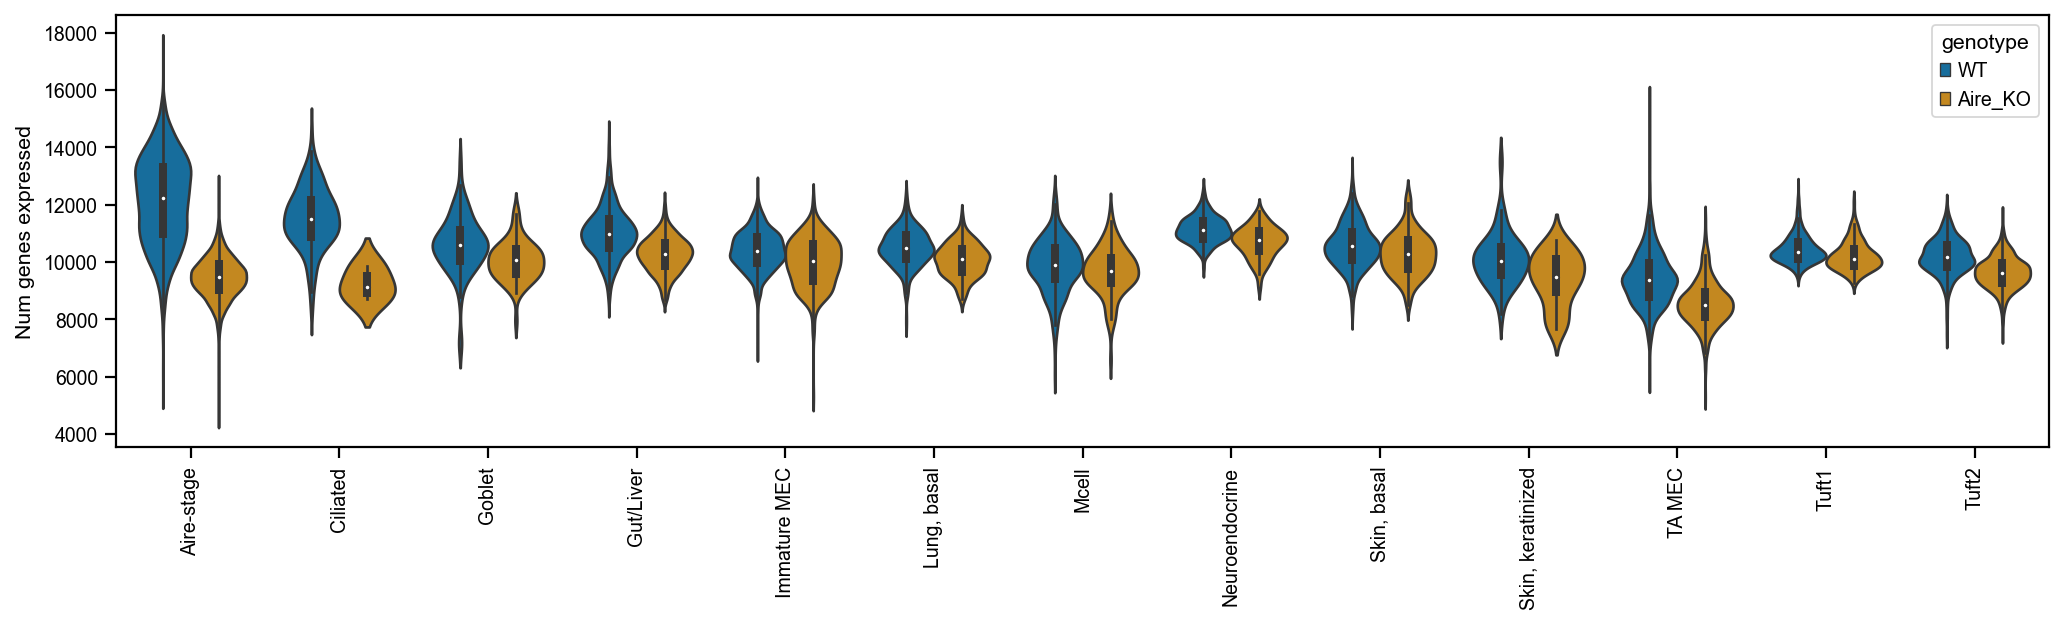

In [8]:
exprs = rna.tl.get_expression_matrix(
    aire, 
    gene_data="scVI_normalized"
)
exprs = exprs > 0.1
exprs = pd.DataFrame(exprs.sum(axis=1))
exprs["cell_type"] = aire.obs.majority_voting
exprs["genotype"] = aire.obs.genotype

plt.figure(figsize=(13,4))
sns.violinplot(
    exprs,
    x="cell_type",
    y=0,
    hue="genotype",
    scale='width',
    width=0.75,
    hue_order=["WT", "Aire_KO"],
    palette=cmap[0:2]
)
plt.xlabel("")
plt.ylabel("Num genes expressed")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

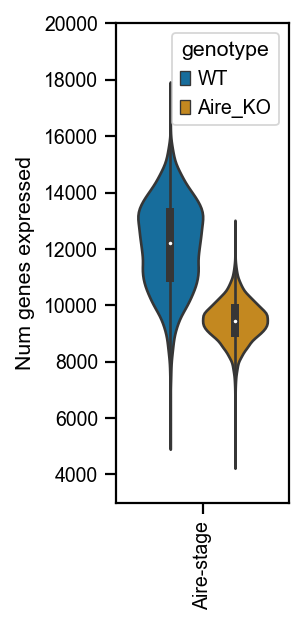

In [27]:
exprs = rna.tl.get_expression_matrix(
    aire[aire.obs.majority_voting == "Aire-stage"], 
    gene_data="scVI_normalized"
)
exprs = exprs > 0.1
exprs = pd.DataFrame(exprs.sum(axis=1))
exprs["cell_type"] = aire.obs.majority_voting
exprs.cell_type = exprs.cell_type.cat.remove_unused_categories()
exprs["genotype"] = aire.obs.genotype

plt.figure(figsize=(2,4))
sns.violinplot(
    exprs,
    x="cell_type",
    y=0,
    hue="genotype",
    scale='width',
    width=0.75,
    hue_order=["WT", "Aire_KO"],
    palette=cmap[0:2],
)
plt.ylim(3000, 20000)
plt.xlabel("")
plt.ylabel("Num genes expressed")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("../../analysis/paper_figures/S3/S3B_Aire_num_genes_expressed.pdf")
plt.show()

In [13]:
ttest_ind(exprs[exprs.genotype == "WT"][0], exprs[exprs.genotype == "Aire_KO"][0])

TtestResult(statistic=150.217187000124, pvalue=0.0, df=16409.0)

# scVI num genes expressed (Fezf2)

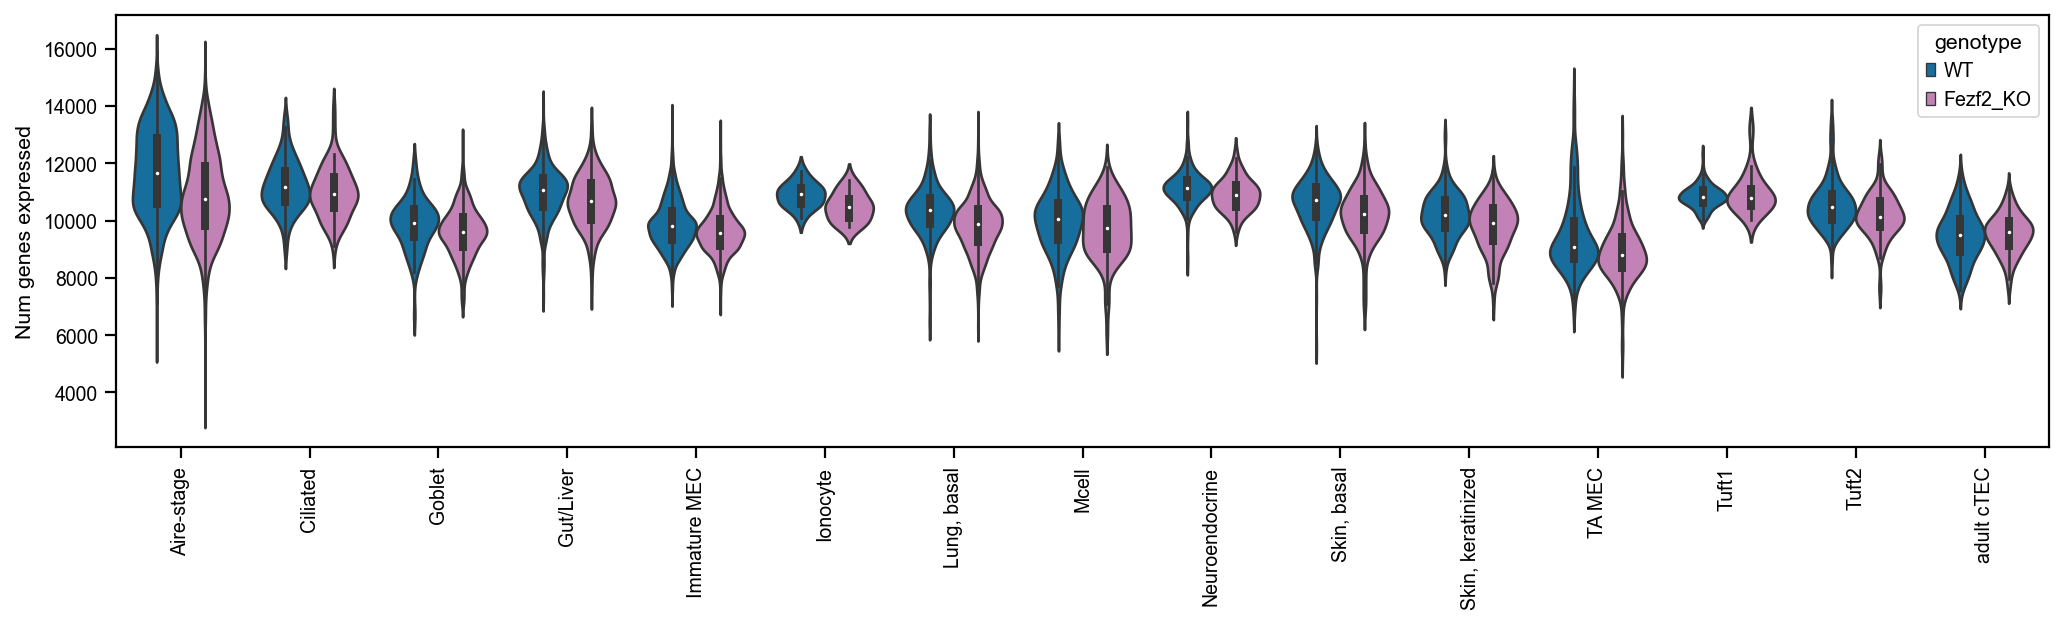

In [14]:
exprs = rna.tl.get_expression_matrix(
    fezf2, 
    gene_data="scVI_normalized"
)
exprs = exprs > 0.1
exprs = pd.DataFrame(exprs.sum(axis=1))
exprs["cell_type"] = fezf2.obs.majority_voting
exprs["genotype"] = fezf2.obs.genotype

plt.figure(figsize=(13,4))
sns.violinplot(
    exprs,
    x="cell_type",
    y=0,
    hue="genotype",
    scale='width',
    width=0.75,
    hue_order=["WT", "Fezf2_KO"],
    palette=[cmap[0], cmap[4]]
)
plt.xlabel("")
plt.ylabel("Num genes expressed")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

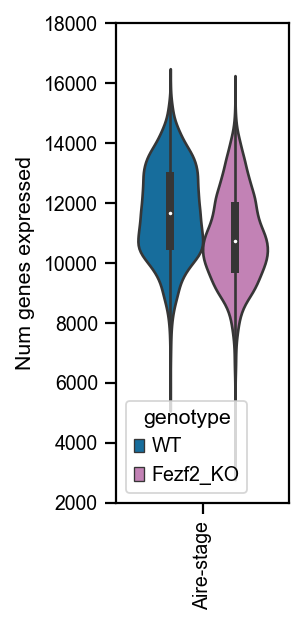

In [25]:
exprs = rna.tl.get_expression_matrix(
    fezf2[fezf2.obs.majority_voting == "Aire-stage"], 
    gene_data="scVI_normalized"
)
exprs = exprs > 0.1
exprs = pd.DataFrame(exprs.sum(axis=1))
exprs["cell_type"] = fezf2.obs.majority_voting
exprs.cell_type = exprs.cell_type.cat.remove_unused_categories()
exprs["genotype"] = fezf2.obs.genotype

plt.figure(figsize=(2,4))
sns.violinplot(
    exprs,
    x="cell_type",
    y=0,
    hue="genotype",
    scale='width',
    width=0.75,
    hue_order=["WT", "Fezf2_KO"],
    palette=[cmap[0], cmap[4]]
)
plt.ylim(2000, 18000)
plt.xlabel("")
plt.ylabel("Num genes expressed")
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig("../../analysis/paper_figures/S3/S3B_Fezf2_num_genes_expressed.pdf")
plt.show()

In [16]:
ttest_ind(exprs[exprs.genotype == "WT"][0], exprs[exprs.genotype == "Fezf2_KO"][0])

TtestResult(statistic=26.27191144819392, pvalue=1.70129225087837e-146, df=8762.0)